# Ensemble Vis


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

# Load predictions

In [6]:
!ls jet_tagger/jsc/adaboost/

jsc_loss=1.294_eval_accuracy.txt model_3_predictions.csv
model_10_predictions.csv         model_4_predictions.csv
model_11_predictions.csv         model_5_predictions.csv
model_12_predictions.csv         model_6_predictions.csv
model_13_predictions.csv         model_7_predictions.csv
model_1_predictions.csv          model_8_predictions.csv
model_2_predictions.csv          model_9_predictions.csv


# load prediction `.csv`

In [14]:
file_name = "jet_tagger/jsc/adaboost/model_1_predictions.csv"

df_model = pd.read_csv(file_name)
df_model = df_model.rename(columns={'pred':'prediction', 'target_label':'target'})
df_model = df_model.assign(sample_index_original = df_model.index)
df_model = df_model.sort_values(by=['target']).reset_index(drop=True)
df_model = df_model.assign(sample_index = df_model.index)
df_model

,0,1,2,3,4,prediction,target,sample_index_original,sample_index
0,0.816831,0.091558,0.016822,0.029591,0.045197,0,0,346,0
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1
2,0.786713,0.082173,0.002774,0.011383,0.116956,0,0,255,2
3,0.029756,0.020906,0.002184,0.001241,0.945914,4,0,117,3
4,0.019472,0.025826,0.004120,0.005092,0.945489,4,0,118,4
...,...,...,...,...,...,...,...,...,...
749,0.006557,0.005694,0.001123,0.001489,0.985138,4,4,612,749
750,0.051536,0.014463,0.001621,0.000989,0.931391,4,4,295,750
751,0.006527,0.009970,0.001381,0.001482,0.980640,4,4,294,751
752,0.410507,0.115202,0.152790,0.132672,0.188829,0,4,586,752


,0,1,2,3,4,pred,target_label,sample_index_original,sample_index
0,0.816831,0.091558,0.016822,0.029591,0.045197,0,0,0,0
1,0.766908,0.114013,0.005879,0.092252,0.020948,0,0,100,1
2,0.105831,0.466074,0.230073,0.186160,0.011863,1,0,99,2
3,0.627179,0.037242,0.001667,0.001667,0.332244,0,0,98,3
4,0.902833,0.057532,0.010571,0.014020,0.015045,0,0,97,4
...,...,...,...,...,...,...,...,...,...
749,0.006480,0.020049,0.733998,0.144723,0.094751,2,4,654,749
750,0.054992,0.016561,0.001502,0.000854,0.926091,4,4,655,750
751,0.396480,0.225394,0.004031,0.004642,0.369453,0,4,656,751
752,0.002638,0.003498,0.001131,0.000599,0.992135,4,4,658,752


## process all predictions

In [15]:


# which models to load
model_names = ['adaboost'] # ['bagging', 'average']
n_members = 13 

# initialize dataframe
df_results = pd.DataFrame()

# loop over hyperparameters
for model_name in model_names:
    
    # loop over ensemble members
    for model_index in range(1, n_members+1): 
        
        # load prediction file
        file_name = f"jet_tagger/jsc/{model_name}/model_{model_index}_predictions.csv"
        df_model = pd.read_csv(file_name)

        df_model = df_model.rename(columns={'pred':'prediction', 'target_label':'target'})
        df_model = df_model.assign(sample_index_original = df_model.index)
        df_model = df_model.sort_values(by=['target']).reset_index(drop=True)
        df_model = df_model.assign(sample_index = df_model.index)

        df_model = df_model.assign(model_index = model_index)
        df_model = df_model.assign(model_name = model_name)

        df_results = pd.concat([df_results, df_model], ignore_index=True, axis=0)


# show df
df_results

,0,1,2,3,4,prediction,target,sample_index_original,sample_index,model_index,model_name
0,0.816831,0.091558,0.016822,0.029591,0.045197,0,0,346,0,1,adaboost
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1,1,adaboost
2,0.786713,0.082173,0.002774,0.011383,0.116956,0,0,255,2,1,adaboost
3,0.029756,0.020906,0.002184,0.001241,0.945914,4,0,117,3,1,adaboost
4,0.019472,0.025826,0.004120,0.005092,0.945489,4,0,118,4,1,adaboost
...,...,...,...,...,...,...,...,...,...,...,...
9797,0.298650,0.311824,0.014556,0.063146,0.311824,1,4,612,749,13,adaboost
9798,0.289078,0.315145,0.017483,0.049258,0.329036,4,4,295,750,13,adaboost
9799,0.174538,0.198667,0.226128,0.226128,0.174538,2,4,294,751,13,adaboost
9800,0.184681,0.210212,0.184681,0.210212,0.210212,1,4,586,752,13,adaboost


## load dataframe

In [16]:
np.random.seed(0)

df = df_results.copy()
df = df.loc[df.model_name.isin(['adaboost'])]
df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, 20))]
df

,0,1,2,3,4,prediction,target,sample_index_original,sample_index,model_index,model_name
4,0.019472,0.025826,0.004120,0.005092,0.945489,4,0,118,4,1,adaboost
135,0.454516,0.209073,0.169168,0.146895,0.020350,0,0,733,135,1,adaboost
177,0.089555,0.208928,0.454202,0.208928,0.038387,2,1,611,177,1,adaboost
184,0.222515,0.483738,0.135753,0.145682,0.012312,1,1,581,184,1,adaboost
228,0.130134,0.282902,0.282902,0.198767,0.105296,1,1,109,228,1,adaboost
...,...,...,...,...,...,...,...,...,...,...,...
9683,0.275489,0.300326,0.030487,0.066302,0.327396,4,4,31,635,13,adaboost
9703,0.239485,0.297172,0.050637,0.088747,0.323959,4,4,121,655,13,adaboost
9753,0.111180,0.221790,0.221790,0.241789,0.203451,3,4,542,705,13,adaboost
9760,0.301726,0.276769,0.039682,0.116742,0.265080,0,4,627,712,13,adaboost


## ploy Joy Division style plot

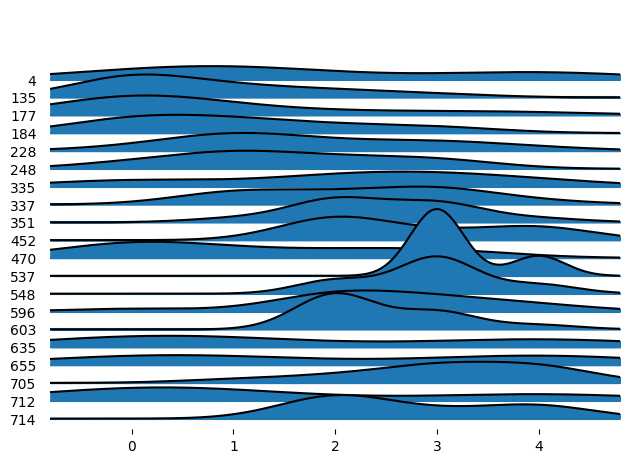

In [17]:
fig, axes = joypy.joyplot(df, by="sample_index", column="prediction")

<AxesSubplot: xlabel='prediction', ylabel='Density'>

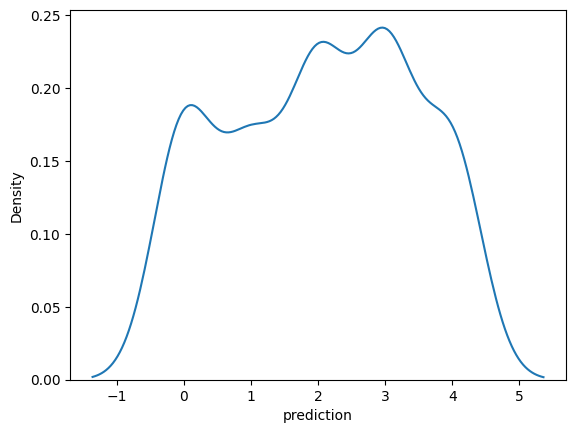

In [18]:
sns.kdeplot(df, x="prediction")

## ploy Joy Division style plot

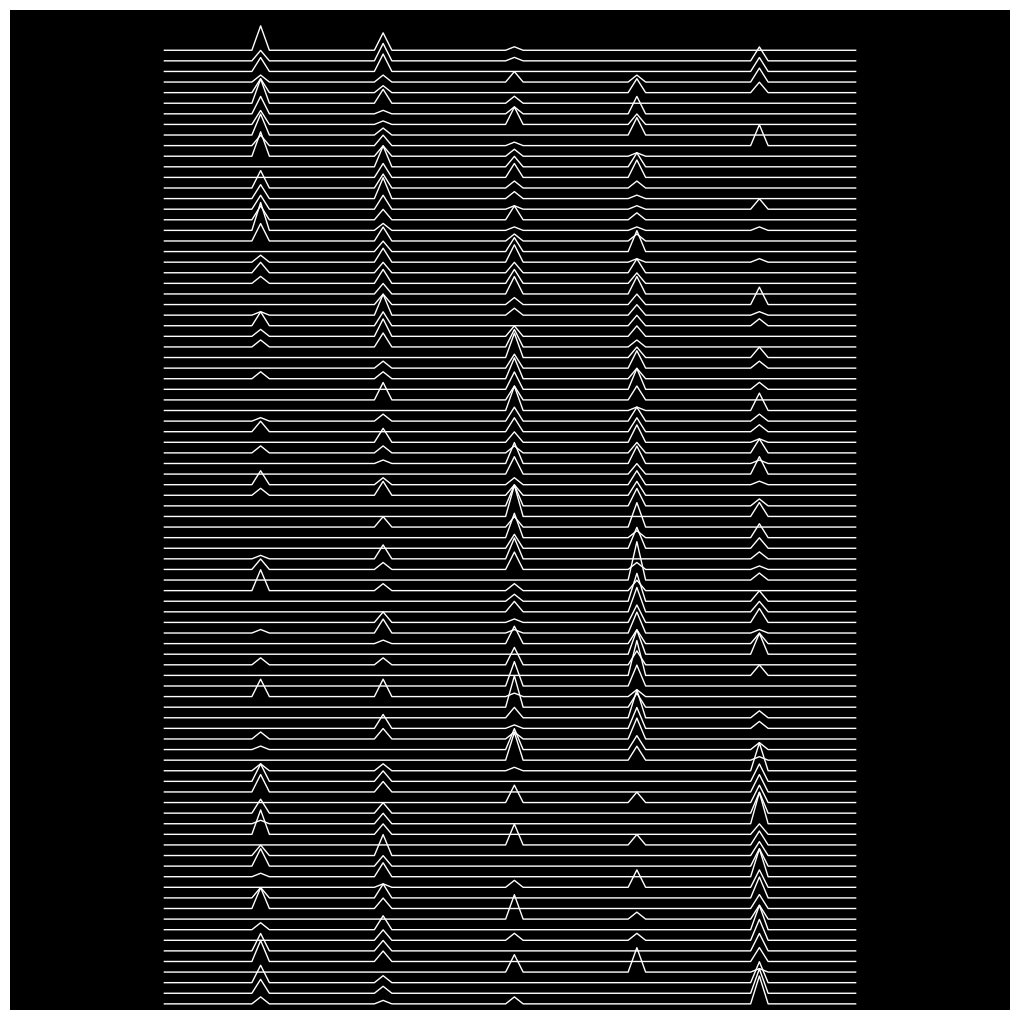

In [46]:
%matplotlib inline

labels = df.target.tolist()
fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                        fill=False, background='k', linecolor="w", linewidth=1, 
                        grid="y", ylabels=False, xlabels=False, 
                        legend=False, overlap=0.5, figsize=(10,10), kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    # a.set_xlim([-1,5])   
    a.set_xlim([-2,6])   


## multiple plots


model_name=adaboost


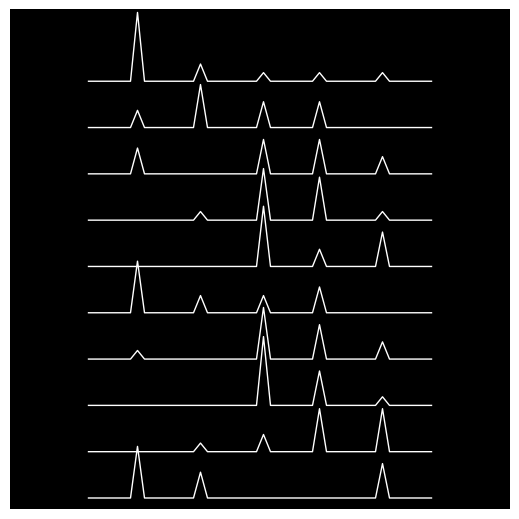

In [52]:
%matplotlib inline

n_predictions = 10

for model_name in model_names:
        
    print(f"model_name={model_name}")

    # extract results
    np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_predictions))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)

    # plot results
    labels = df.target.tolist()
    fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                            fill=False, background='k', linecolor="w", linewidth=1, 
                            grid="y", ylabels=False, xlabels=False, 
                            legend=False, overlap=0.5, figsize=(5,5), 
                            kind="counts", bins=50
                            )

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    for a in axes[:-1]:
        a.set_xlim([-2,6])      
    plt.show()

        

In [48]:
df.sort_values(["target"])

,0,1,2,3,4,prediction,target,sample_index_original,sample_index,model_index,model_name
1,0.675824,0.218419,0.040131,0.049596,0.016029,0,0,708,1,1,adaboost
7570,0.196249,0.205741,0.111338,0.226124,0.260548,4,0,100,30,11,adaboost
7544,0.247730,0.259712,0.079736,0.140546,0.272275,4,0,118,4,11,adaboost
7541,0.206372,0.206372,0.237788,0.237788,0.111680,2,0,708,1,11,adaboost
4528,0.268182,0.268182,0.127034,0.160446,0.176155,0,0,118,4,7,adaboost
...,...,...,...,...,...,...,...,...,...,...,...
6765,0.305733,0.335530,0.010261,0.012947,0.335530,1,4,339,733,9,adaboost
6759,0.324577,0.324577,0.013744,0.012524,0.324577,0,4,211,727,9,adaboost
6755,0.200431,0.200431,0.191324,0.166413,0.241401,4,4,226,723,9,adaboost
2251,0.006225,0.016013,0.397816,0.503816,0.076130,3,4,316,743,3,adaboost


model_name=adaboost


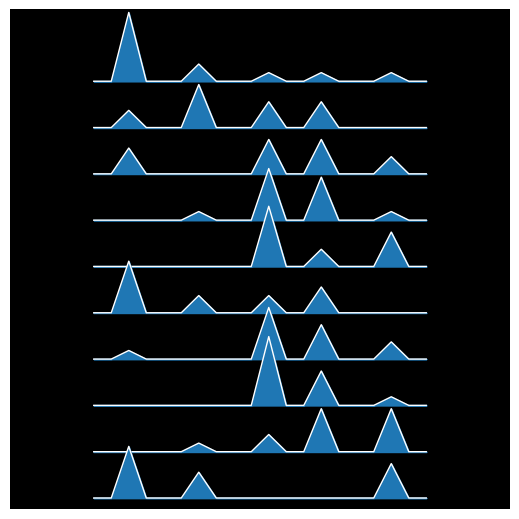

In [51]:
%matplotlib inline

n_predictions = 10

for model_name in model_names:
        
    print(f"model_name={model_name}")

        
    # extract results
    np.random.seed(0)

    df = df_results.copy()
    df = df.loc[df.model_name.isin([model_name])]
    df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, n_predictions))]
    #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
    #df = df.reset_index(drop=True)

    # plot results
    labels = df.target.tolist()
    fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                            fill=True, background='k', linecolor="w", linewidth=1, 
                            grid="y", ylabels=False, xlabels=False, 
                            legend=False, overlap=0.5, figsize=(5,5), 
                            kind="counts", bins=20
                            )

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    for a in axes[:-1]:
        a.set_xlim([-2,6])      
    plt.show()

